Nama Kelompok:
1.   Alviatul Nazila (202010370311293)
2.   Clarissa Sanindita Reikisyifa (202010370311232)

#Import Library

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from transformers import BertTokenizer, BertForSequenceClassification
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


#Load Dataset

In [ ]:
url = 'G:\My Drive\Batik Project\GAN\Icha\BatikGAN\ML\preprocessing\combine_data_proses.csv'
df = pd.read_csv(url)
df.tail()

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
3001,@kasrulsani9 @Cintada16 @Leonita_Lestari Prof ...,Prof pak Mahfud MD kok di LAWAN grinning_face ...,Prof pak Mahfud MD kok di LAWAN wajah menyerin...,prof pak mahfud md kok di lawan wajah menyerin...,"['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'mahfud', 'lawan', 'seringai', 'serin...",prof mahfud lawan seringai seringai bergulingg...,positive
3002,"@Melihat_Indo Alhamdulillah, semakin yakin kem...","Alhamdulillah, semakin yakin kemenangan Ganjar...","Alhamdulillah, semakin yakin kemenangan Ganjar...",alhamdulillah semakin yakin kemenangan ganjar ...,"['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'makin', 'yakin', 'menang', ...","['menang', 'ganjar', 'mahfud', 'semangat']",menang ganjar mahfud semangat,positive
3003,@gus_dibyo Pak Bas sosok yg berkarakter kuat d...,"Pak Bas sosok yg berkarakter kuat dan hebat, I...","Pak Bas sosok yg berkarakter kuat dan hebat, I...",pak bas sosok yg berkarakter kuat dan hebat in...,"['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'karakter', 'kua...","['sosok', 'karakter', 'kuat', 'hebat', 'insyaa...",sosok karakter kuat hebat insyaallah ganjar ma...,positive
3004,@Gus_Raharjo Indonesia harus di pimpin oleh or...,Indonesia harus di pimpin oleh orang yg bener2...,Indonesia harus di pimpin oleh orang yg bener2...,indonesia harus di pimpin oleh orang yg bener ...,"['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'harus', 'di', 'pimpin', 'oleh',...","['indonesia', 'pimpin', 'paham', 'konstitusi',...",indonesia pimpin paham konstitusi ganjar mahfud,positive
3005,@Leony_aja @ganjarpranowo Gaspol Ganjar-Mahfud...,Gaspol Ganjar-Mahfud,Gaspol Ganjar-Mahfud,gaspol ganjarmahfud,"['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']","['gaspol', 'ganjarmahfud']",gaspol ganjarmahfud,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emoticon             3006 non-null   object
 1   convert_emoji        3004 non-null   object
 2   translate_emoji      3004 non-null   object
 3   cleaned              3004 non-null   object
 4   tokenize             3006 non-null   object
 5   normalization        3006 non-null   object
 6   stemmed              3006 non-null   object
 7   stopwords_stemmed    3006 non-null   object
 8   text_string_stemmed  2999 non-null   object
 9   label                3006 non-null   object
dtypes: object(10)
memory usage: 235.0+ KB


In [ ]:
df.describe()

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
count,3006,3004,3004,3004,3006,3006,3006,3006,2999,3006
unique,2939,2908,2908,2907,2908,2908,2908,2844,2843,3
top,Sosok Hardjanto yang telah melukis selama 50 t...,Bravo Gus Muhaimin Iskandar untuk Indonesia Ma...,Bravo Gus Muhaimin Iskandar untuk Indonesia Ma...,bravo gus muhaimin iskandar untuk indonesia ma...,"['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['bravo', 'gus', 'muhaimin', 'iskandar', 'untu...","['dukung', 'ganjar', 'mahfud']",dukung ganjar mahfud,positive
freq,4,8,8,8,8,8,8,14,14,1546


#Processing Data

In [ ]:
df.isnull().sum()

emoticon               0
convert_emoji          2
translate_emoji        2
cleaned                2
tokenize               0
normalization          0
stemmed                0
stopwords_stemmed      0
text_string_stemmed    7
label                  0
dtype: int64

In [ ]:
df.dropna(subset=['text_string_stemmed'], inplace=True)
df

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
0,@DPP_PKB @cakimiNOW Cak Imin sangat berkarisma...,Cak Imin sangat berkarismatik ....memang cocok...,Cak Imin sangat berkarismatik ....memang cocok...,cak imin sangat berkarismatik memang cocok men...,"['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'karismatik', 'meman...","['cak', 'imin', 'karismatik', 'cocok', 'dampin...",cak imin karismatik cocok damping anis,positive
1,@Adiprayitno_20 lho...lho gak bahaya tah kalau...,lho...lho gak bahaya tah kalau cawapres juga d...,lho...lho gak bahaya tah kalau cawapres juga d...,lholho gak bahaya tah kalau cawapres juga diun...,"['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'cawapres', 'undan...",lholho gak bahaya cawapres undang makan siang,negative
2,@FandiFrezian @sasbudiarjo @kikysaputrii Karna...,Karna posisinya pak Anis masih jadi Gubernur D...,Karna posisinya pak Anis masih jadi Gubernur D...,karna posisinya pak anis masih jadi gubernur d...,"['karna', 'posisinya', 'pak', 'anis', 'masih',...","['karena', 'posisinya', 'pak', 'anis', 'masih'...","['karena', 'posisi', 'pak', 'anis', 'masih', '...","['anis', 'gubernur', 'dki', 'cak', 'imin', 'da...",anis gubernur dki cak imin dateng lapor cawapr...,positive
3,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,cak imin tak khawatir yenny dukung ganjarmahfu...,"['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'khawatir', 'yenny', 'dukung',...",cak imin khawatir yenny dukung ganjarmahfud su...,neutral
4,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,susi pudjiastuti dikabarkan masuk calon kapten...,"['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['sus', 'pudjiastuti', 'kabar', 'masuk', 'calo...","['sus', 'pudjiastuti', 'kabar', 'calon', 'kapt...",sus pudjiastuti kabar calon kapten timnas mena...,positive
...,...,...,...,...,...,...,...,...,...,...
3001,@kasrulsani9 @Cintada16 @Leonita_Lestari Prof ...,Prof pak Mahfud MD kok di LAWAN grinning_face ...,Prof pak Mahfud MD kok di LAWAN wajah menyerin...,prof pak mahfud md kok di lawan wajah menyerin...,"['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'mahfud', 'lawan', 'seringai', 'serin...",prof mahfud lawan seringai seringai bergulingg...,positive
3002,"@Melihat_Indo Alhamdulillah, semakin yakin kem...","Alhamdulillah, semakin yakin kemenangan Ganjar...","Alhamdulillah, semakin yakin kemenangan Ganjar...",alhamdulillah semakin yakin kemenangan ganjar ...,"['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'makin', 'yakin', 'menang', ...","['menang', 'ganjar', 'mahfud', 'semangat']",menang ganjar mahfud semangat,positive
3003,@gus_dibyo Pak Bas sosok yg berkarakter kuat d...,"Pak Bas sosok yg berkarakter kuat dan hebat, I...","Pak Bas sosok yg berkarakter kuat dan hebat, I...",pak bas sosok yg berkarakter kuat dan hebat in...,"['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'karakter', 'kua...","['sosok', 'karakter', 'kuat', 'hebat', 'insyaa...",sosok karakter kuat hebat insyaallah ganjar ma...,positive
3004,@Gus_Raharjo Indonesia harus di pimpin oleh or...,Indonesia harus di pimpin oleh orang yg bener2...,

In [ ]:
df.duplicated().sum()

50

In [ ]:
df = df.drop_duplicates()

In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)


['positive' 'negative' 'neutral']


In [ ]:
sentiment_labels = {'positive': 2, 'negative': 1, 'neutral': 0}
df['sentimen'] = df['label'].map(sentiment_labels)

C:\Users\riset\AppData\Local\Temp\ipykernel_12120\1294129029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['label'].map(sentiment_labels)


#Spliting Feature & Label

In [ ]:
X = df['text_string_stemmed']
y = df['label']

#Spliting Train, Val, dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

#Normalisasi Data

In [ ]:
def encode_reviews(reviews, max_length=100):
    return tokenizer.batch_encode_plus(
        reviews.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

In [ ]:
encoded_X_train = encode_reviews(X_train)
encoded_X_test = encode_reviews(X_test)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Model

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Training Model

In [ ]:
history = model.fit(
    {'input_ids': encoded_X_train['input_ids'], 'attention_mask': encoded_X_train['attention_mask']},
    y_train_one_hot,
    validation_split=0.1,
    epochs=100,
    batch_size=32
)

Epoch 1/100
67/67 [==============================] - 68s 859ms/step - loss: 0.8645 - accuracy: 0.5855 - val_loss: 0.7331 - val_accuracy: 0.6525
Epoch 2/100
67/67 [==============================] - 50s 741ms/step - loss: 0.7151 - accuracy: 0.6797 - val_loss: 0.7139 - val_accuracy: 0.6992
Epoch 3/100
67/67 [==============================] - 50s 743ms/step - loss: 0.6159 - accuracy: 0.7400 - val_loss: 0.6605 - val_accuracy: 0.7119
Epoch 4/100
67/67 [==============================] - 50s 742ms/step - loss: 0.4858 - accuracy: 0.8078 - val_loss: 0.7148 - val_accuracy: 0.6949
Epoch 5/100
67/67 [==============================] - 48s 709ms/step - loss: 0.3990 - accuracy: 0.8516 - val_loss: 0.7251 - val_accuracy: 0.7203
Epoch 6/100
67/67 [==============================] - 47s 708ms/step - loss: 0.2418 - accuracy: 0.9195 - val_loss: 1.0009 - val_accuracy: 0.6737
Epoch 7/100
67/67 [==============================] - 46s 687ms/step - loss: 0.1801 - accuracy: 0.9425 - val_loss: 0.8787 - val_accuracy:

#Evaluasi Model

In [ ]:
test_loss, test_accuracy = model.evaluate(
    {'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']},
    y_test_one_hot
)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

19/19 [==============================] - 1s 39ms/step - loss: 2.1454 - accuracy: 0.6881
Test Accuracy: 68.81%


#Plotting Training & Validation Accuracy and Loss

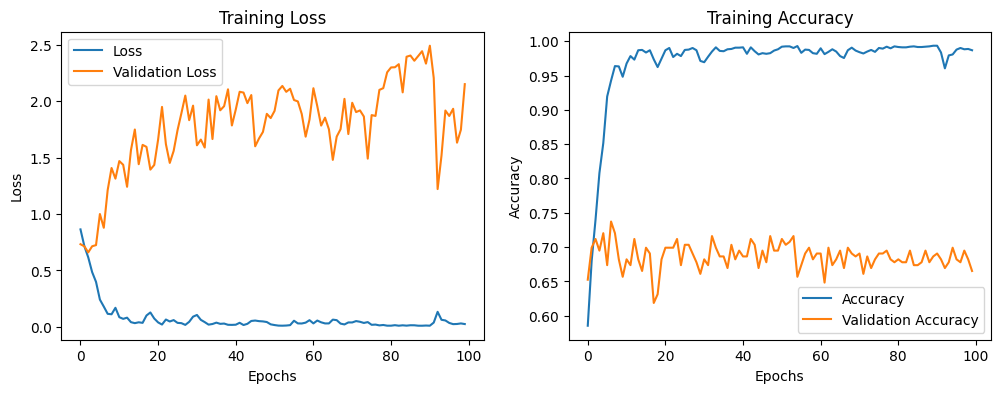

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)


# Clasification Report

In [ ]:
test_pred_array = test_pred[0]
test_pred_labels = np.argmax(test_pred_array, axis=1)

report = classification_report(y_test_encoded, test_pred_labels, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

    negative       0.60      0.57      0.58       142
     neutral       0.55      0.44      0.49       152
    positive       0.77      0.87      0.82       296

    accuracy                           0.69       590
   macro avg       0.64      0.63      0.63       590
weighted avg       0.67      0.69      0.68       590

